# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

Este conjunto de datos fue creado como parte de un estudio de investigación destinado a comprender los factores que contribuyen al agotamiento laboral (*burnout*) de los empleados en entornos corporativos. Los datos fueron recolectados mediante encuestas estructuradas y estudios observacionales realizados en empresas con sede en Bengaluru, India. Se enfoca en una variedad de indicadores relacionados con el bienestar laboral y personal, tales como el equilibrio entre la vida laboral y personal, el apoyo del gerente, los patrones de sueño, la carga de trabajo y el reconocimiento. El conjunto de datos ofrece una visión integral de variables comúnmente asociadas con el estrés y el agotamiento de los empleados, brindando información valiosa para el análisis organizacional y el diseño de estrategias de intervención. *(14-04-2018)*

**Fuente del dataset:**  
Shankar, Kunal, 2018, *"Employee Burnout Analysis"*, Harvard Dataverse, [https://doi.org/10.7910/DVN/VG6KQD](https://doi.org/10.7910/DVN/VG6KQD)  


### Carga de datos y visualización rápida

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
sns.set_palette("pastel")

#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [4]:
df_csv = pd.read_csv("data/enriched_employee_dataset.csv")

In [5]:
df_csv.head() 

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [92]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,16,56,5.8,1,3,4,17,1
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41,16,58,5.3,1,3,4,5,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,16,50,5.8,2,2,5,3,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72,16,50,5.2,1,2,4,15,0
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,16,59,5.8,2,3,4,8,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61,17,53,5.4,2,2,4,17,0


In [93]:
df_csv.shape

(22750, 17)

In [94]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [95]:
df_csv.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [96]:
cols_analizar = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Years in Company', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency']  

for col in cols_analizar:
    print(f"\nValores únicos en {col}: {df_csv[col].unique()}")


Valores únicos en Gender: ['Female' 'Male']

Valores únicos en Company Type: ['Service' 'Product']

Valores únicos en WFH Setup Available: ['No' 'Yes']

Valores únicos en Designation: [2 1 3 0 4 5]

Valores únicos en Resource Allocation: [ 3.  2. nan  1.  7.  4.  6.  5.  8. 10.  9.]

Valores únicos en Years in Company: [16 17]

Valores únicos en Work-Life Balance Score: [3 5 2 1 4]

Valores únicos en Manager Support Score: [3 4 5 2 1]

Valores únicos en Deadline Pressure Score: [1 3 5 4 2]

Valores únicos en Team Size: [16 10 17 13 18  9 14 12  8 19  3  7 15  4 11  6  5]

Valores únicos en Recognition Frequency: [2 5 0 1 4 3]


**Análisis preliminar de las variables del dataset**

| Variable                | Descripción                                                   | Tipo de dato                                             | Acción posible                       |
|-------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------------------------|
| Employee ID             | Código de identificación del empleado                         | Categórica - Nominal                                     | Evaluar quitar del dataset           |
| Date of Joining         | Fecha de inicio                                               | Fecha (Categórica/Numérica según el uso)                 | Convertir a formato fecha / Quitar del dataset (mismo motivo que years in company)            | 
| Gender                  | Género (F/M)                                                  | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Company Type            | Tipo de compañía (Productos/Servicios)                        | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| WFH Setup Available     | Posibilidad de trabajo remoto (*Work From Home*) (Sí/No)      | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Designation             | Designación - Nivel jerárquico (0 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Resource Allocation     | Recursos bajo su responsabilidad (1 a 10)        | Categórica - Ordinal (Representación numérica discreta)  | Estrategia para valores nulos  |
| Mental Fatigue Score    | Nivel de fatiga mental (0 a 10)                               | Numérica continua                                        | Estrategia para valores nulos                                     |
| Burn Rate               | Tasa de agotamiento (valores entre 0 y 1)                     | Numérica continua                                        | Definir como output (y)              |
| Years in Company        | Años en la empresa (16 o 17)                                  | Numérica discreta                                        | Evaluar quitar del dataset           |
| Work Hours per Week     | Horas de trabajo por semana (entre 35 y 59)                   | Numérica discreta                                        |                                      |
| Sleep Hours             | Horas de sueño (entre 3.4 y 9.1)                              | Numérica continua                                        |                                      |
| Work-Life Balance Score | Nivel de equilibrio trabajo-vida personal (1 a 5)             | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Manager Support Score   | Nivel de apoyo de la organización (1 a 5)                     | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Deadline Pressure Score | Nivel de presión con deadlines (1 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Team Size               | Cantidad de personas en el equipo (valores entre 3 y 19)      | Numérica discreta                                        |                                      |
| Recognition Frequency   | Frecuencia de reconocimiento (0 a 5)                          | Categórica - Ordinal (Representación numérica discreta)  |                                      |


### 2. Limpieza de datos

#### 2.1 Limpieza de datos: valores nulos

In [6]:
#### 2.1 Revisar datos faltantes y duplicados
print(f"Valores faltantes: {df_csv.isnull().sum()}")  # Calcular valores faltantes

Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


<Axes: >

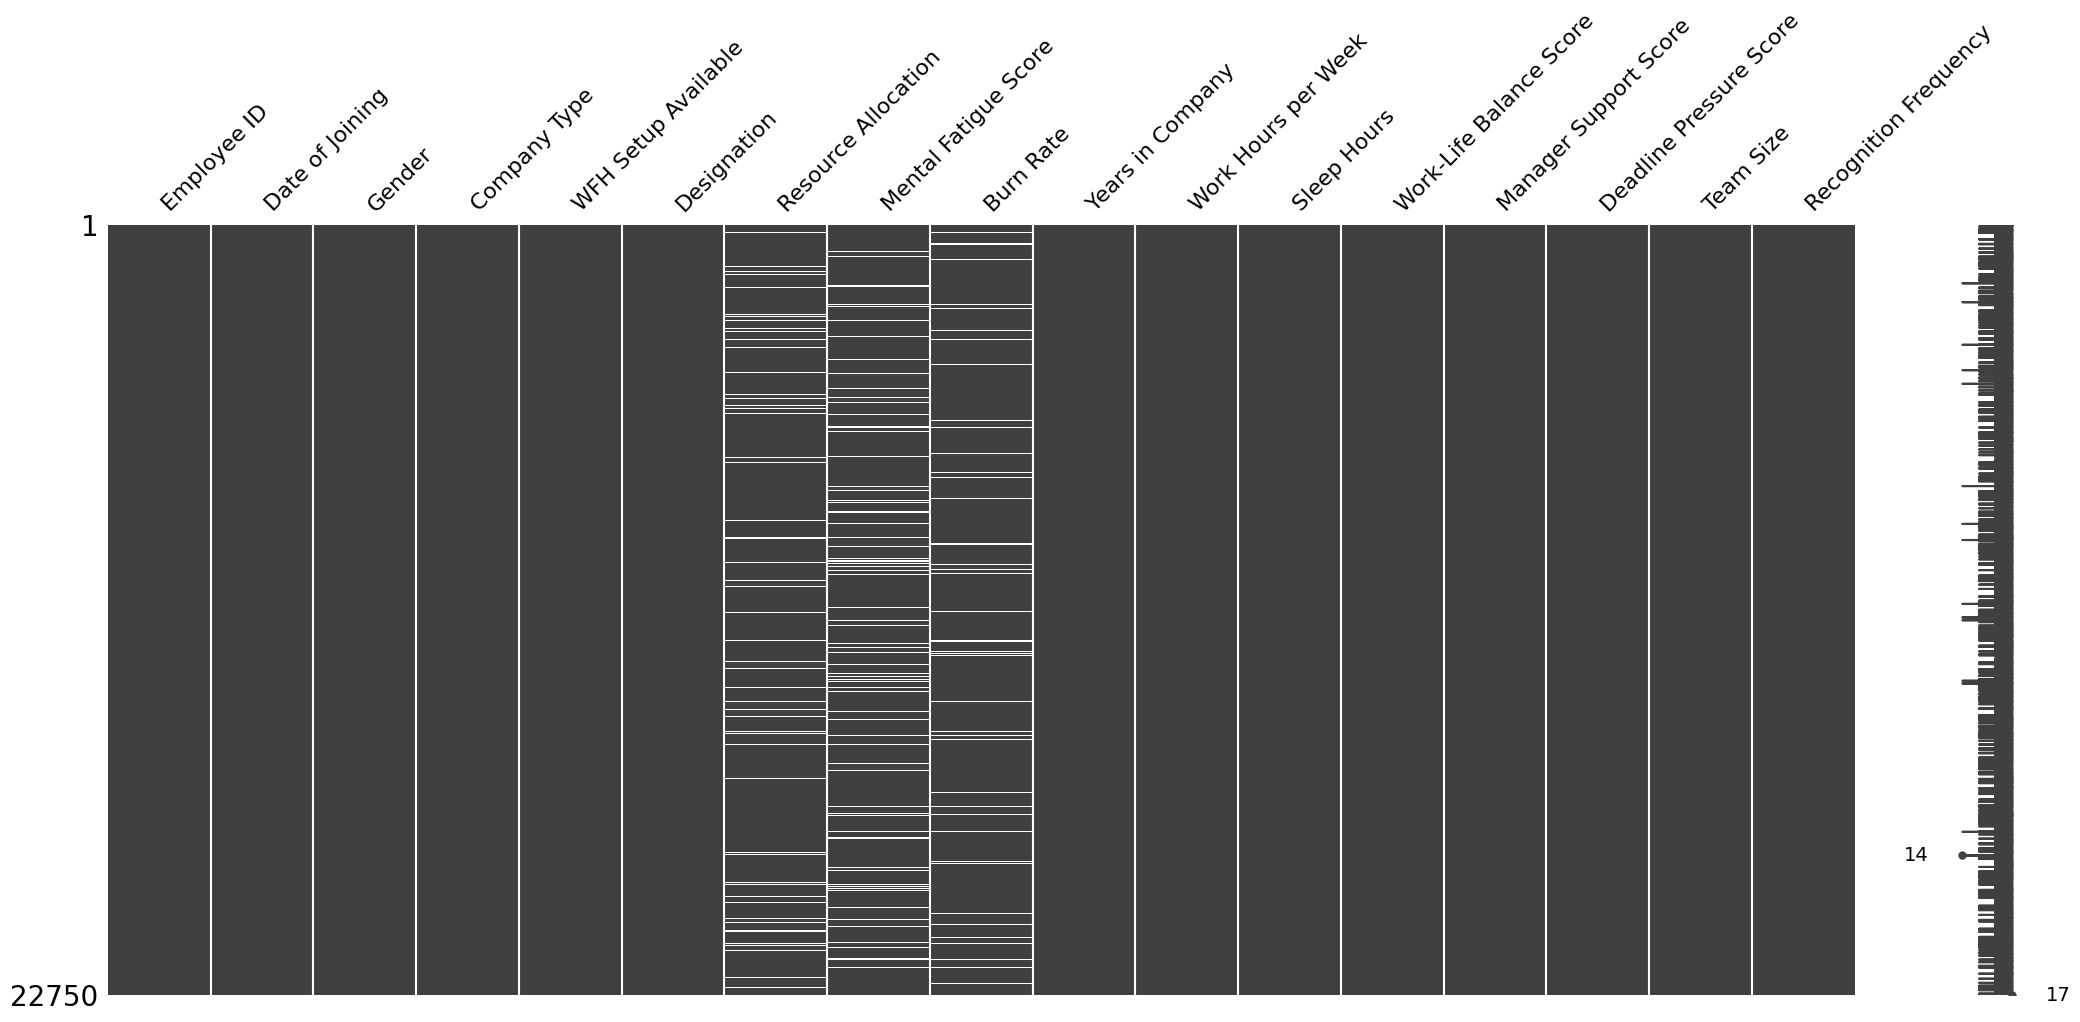

In [102]:
# Visualización de valores faltantes
import missingno as msno
msno.matrix(df_csv)

In [103]:
# Ver cuántas filas tienen al menos dos nulos
print("Filas con al menos dos nulos:", df_csv.isna().sum(axis=1).gt(1).sum())

Filas con al menos dos nulos: 447


1. **Más de un nulo:** Se eliminan las observaciones que tengan más de un valor nulo, ya que no representan un alto porcentaje del total y podrían ser datos erróneos o haber distintas razones por las que la persona eligió no responder.

In [7]:
# Eliminar filas con dos nulos
df_limpio = df_csv.dropna(thresh=len(df_csv.columns)-1)
print("Filas restantes tras eliminación:", df_limpio.shape[0])

Filas restantes tras eliminación: 22303


In [105]:
# Comparar antes y después
print("Valores nulos antes de limpieza:\n", df_csv[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())
print("Valores nulos después de limpieza:\n", df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())

Valores nulos antes de limpieza:
 Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64
Valores nulos después de limpieza:
 Resource Allocation     1091
Mental Fatigue Score    1758
Burn Rate                864
dtype: int64


In [106]:
# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 98.04 %


2. **Burn Rate:** Al tratarse de la variable de salida, sería incorrecto imputarle algún valor, ya que esto tendría una gran repercusión en los resultados del modelo y podríamos estar introduciendo ruido. Por esta razón, se eliminan las filas con valores nulos en Burn Rate.

In [8]:
# Eliminar filas con valor nulo en Burn Rate
df_limpio = df_limpio.dropna(subset=['Burn Rate'])
print("Filas restantes tras eliminación:", df_limpio.shape[0])

Filas restantes tras eliminación: 21439


In [108]:
# Comparar antes y después
print("Valores nulos antes de limpieza:\n", df_csv[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())
print("Valores nulos después de limpieza:\n", df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())

Valores nulos antes de limpieza:
 Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64
Valores nulos después de limpieza:
 Resource Allocation     1091
Mental Fatigue Score    1758
Burn Rate                  0
dtype: int64


In [109]:
# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 94.24 %


2. **Resource Allocation:** Se analiza la relación entre Resource Allocation y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [9]:
# Se analiza si hay algún valor de las otras variables que se mantenga constante para los nulos de 'Resource Allocation'
nulos_ra = df_limpio[df_limpio['Resource Allocation'].isnull()]
nulos_ra = nulos_ra.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Resource Allocation'])
nulos_ra.head(15)


,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
2,Female,Product,Yes,2,5.8,0.49,53,5.7,2,3,5,17,0
23,Female,Product,Yes,3,7.7,0.61,49,5.2,1,1,4,17,1
25,Female,Service,Yes,3,5.8,0.40,41,7.1,5,5,1,13,5
48,Female,Product,No,3,7.7,0.61,48,6.2,2,1,5,6,1
61,Male,Product,No,3,8.0,0.68,52,5.9,1,1,5,6,1
99,Female,Service,Yes,2,6.7,0.44,51,5.4,1,3,4,8,0
118,Female,Product,No,2,7.8,0.67,50,5.6,2,1,4,4,0
129,Female,Product,Yes,4,8.9,0.76,53,5.1,1,3,5,3,1
222,Female,Service,No,3,5.8,0.47,51,6.0,2,1,4,19,0
252,Male,Product,Yes,3,7.3,0.63,57,5.3,2,1,5,11,0


3. **Mental Fatigue Score:** Se analiza la relación entre Mental Fatigue Score y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [111]:
nulos_mfs = df_limpio[df_limpio['Mental Fatigue Score'].isnull()]
nulos_mfs = nulos_mfs.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Mental Fatigue Score'])
nulos_mfs.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
8,Female,Service,No,3,6.0,0.56,50,5.0,1,2,4,16,1
9,Female,Product,No,3,6.0,0.67,58,4.5,2,3,4,12,0
12,Male,Service,Yes,2,5.0,0.40,40,7.6,3,5,1,9,4
13,Female,Product,No,1,3.0,0.33,39,6.5,4,4,3,8,4
19,Female,Service,No,3,5.0,0.68,55,6.2,1,2,5,18,1
24,Female,Service,No,3,8.0,0.91,59,5.5,1,1,5,17,1
29,Female,Service,Yes,2,4.0,0.45,50,4.9,1,1,4,11,1
40,Female,Service,Yes,3,5.0,0.50,49,4.9,1,1,4,8,1
77,Female,Product,Yes,0,1.0,0.04,36,7.2,5,4,2,13,2
92,Male,Product,No,4,9.0,0.76,57,5.4,1,1,5,14,1


**Análisis de histogramas de Resource Allocation y Mental Fatigue Score:** Se evalúa la distribución de los datos para 'Resource Allocation' y 'Mental Fatigue Score' para evaluar si se pueden imputar. 
- Mental Fatigue Score: se observa una distribución con un pico, por lo que en una primera instancia se propone imputar con una constante estadística (en este caso la mediana, en línea punteada azul). 
- Resource Allocation: se evalúa la correlación con otras variables para evaluar otras estrategias de imputación.

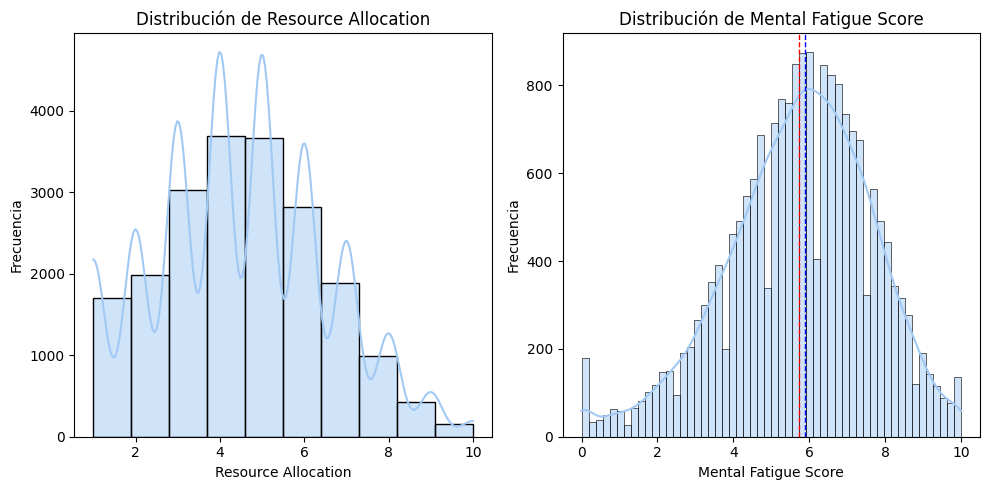

In [112]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Resource Allocation'], bins=10, kde=True)
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_limpio['Mental Fatigue Score'], bins='auto', kde=True)
plt.axvline(df_limpio['Mental Fatigue Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


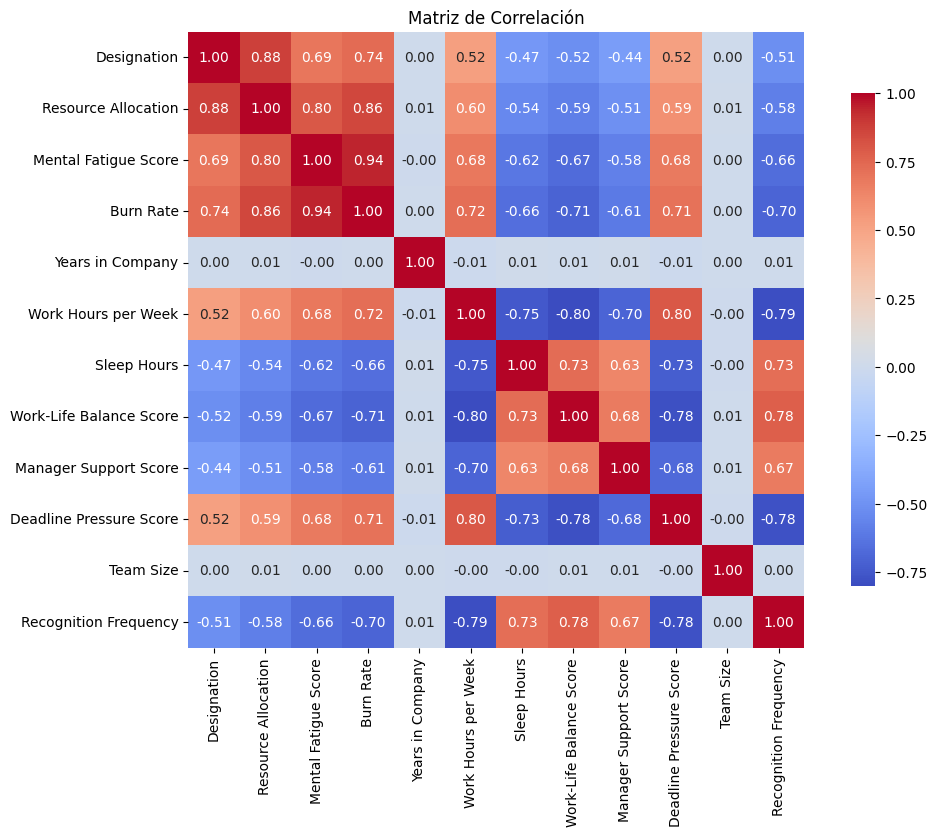

In [113]:
# Evaluar correlación entre 'Resource Allocation' y 'Mental Fatigue Score' y otras variables
# Obtener matriz de correlación
correlation_matrix = df_limpio.corr(numeric_only=True)
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

In [10]:
# Imputación de valores nulos de 'Mental Fatigue Score' usando regresión lineal

df_mf_train = df_limpio[df_limpio['Mental Fatigue Score'].notnull() &
                 df_limpio['Designation'].notnull() &
                 df_limpio['Resource Allocation'].notnull() &
                 df_limpio['Burn Rate'].notnull() &
                 df_limpio['Work Hours per Week'].notnull() &
                 df_limpio['Deadline Pressure Score'].notnull()]

X_mf = df_mf_train[['Designation', 'Resource Allocation', 'Burn Rate', 'Work Hours per Week',
                    'Deadline Pressure Score']]
y_mf = df_mf_train['Mental Fatigue Score']

model_mf = LinearRegression()
model_mf.fit(X_mf, y_mf)

# Predecir valores nulos
df_mf_pred = df_limpio[df_limpio['Mental Fatigue Score'].isnull() &
                df_limpio['Designation'].notnull() &
                df_limpio['Resource Allocation'].notnull() &
                df_limpio['Burn Rate'].notnull() &
                df_limpio['Work Hours per Week'].notnull() &
                df_limpio['Deadline Pressure Score'].notnull()]

X_mf_pred = df_mf_pred[['Designation', 'Resource Allocation', 'Burn Rate', 'Work Hours per Week',
                    'Deadline Pressure Score']]

df_limpio_MFS_LR=df_limpio.copy()
df_limpio_MFS_LR.loc[df_mf_pred.index, 'Mental Fatigue Score'] = model_mf.predict(X_mf_pred)


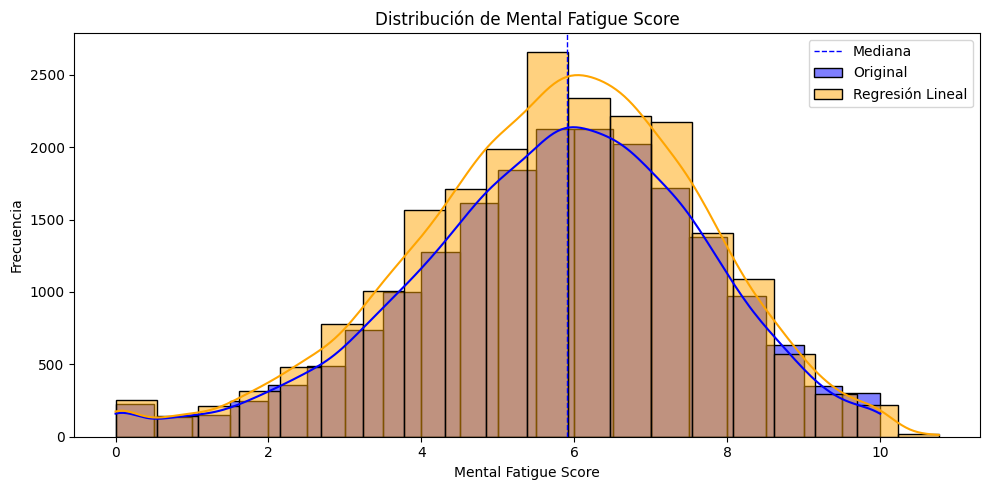

In [11]:
# Graficar histograma de 'Mental Fatigue Score' original y con imputación por regresión lineal
plt.figure(figsize=(10, 5))

sns.histplot(df_limpio['Mental Fatigue Score'], bins=20, kde=True, label='Original', color='blue')
plt.axvline(df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
sns.histplot(df_limpio_MFS_LR['Mental Fatigue Score'], bins=20, kde=True, label='Regresión Lineal', color='orange')

plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

Se observa que al imputar utilizando regresión lineal, la gráfica conserva su estructura original y la curva sigue la misma distribución que antes de la imputación. Esto sugiere que el método de imputación elegido es adecuado, ya que no introduce ningún sesgo significativo.

El mismo enfoque se aplica a continuación para Resource Allocation:

In [12]:
df_limpio=df_limpio_MFS_LR.copy()

# Filas completas para entrenamiento
df_ra_train = df_limpio[df_limpio['Resource Allocation'].notnull() &
                 df_limpio['Designation'].notnull() &
                 df_limpio['Mental Fatigue Score'].notnull() &
                 df_limpio['Burn Rate'].notnull() &
                 df_limpio['Work Hours per Week'].notnull()]

X_ra = df_ra_train[['Designation', 'Mental Fatigue Score', 'Burn Rate',
                    'Work Hours per Week']]
y_ra = df_ra_train['Resource Allocation']

model_ra = LinearRegression()
model_ra.fit(X_ra, y_ra)

# Predecir valores nulos
df_ra_pred = df_limpio[df_limpio['Resource Allocation'].isnull() &
                df_limpio['Designation'].notnull() &
                df_limpio['Mental Fatigue Score'].notnull() &
                df_limpio['Burn Rate'].notnull() &
                df_limpio['Work Hours per Week'].notnull()]

X_ra_pred = df_ra_pred[['Designation', 'Mental Fatigue Score', 'Burn Rate',
                        'Work Hours per Week']]

df_limpio_RA_LR=df_limpio.copy()
df_limpio_RA_LR.loc[df_ra_pred.index, 'Resource Allocation'] = model_ra.predict(X_ra_pred)


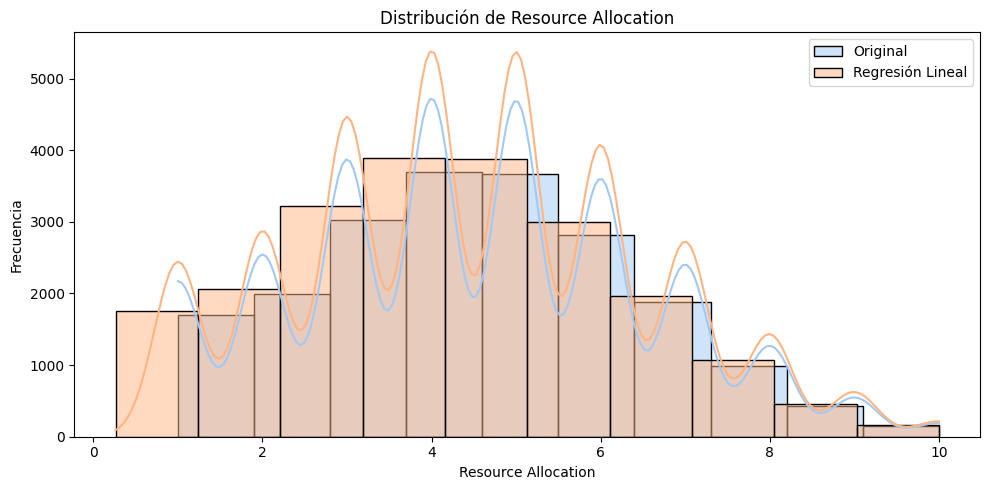

In [13]:
# Comparar histogramas de 'Resource Allocation' original y con imputación por regresión lineal
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio['Resource Allocation'], bins=10, kde=True, label='Original')
sns.histplot(df_limpio_RA_LR['Resource Allocation'], bins=10, kde=True, label='Regresión Lineal')
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

Se observa que la distribución original de Resource Allocation y la imputada mediante regresión lineal presentan una forma bastante similar, lo cual indica que la imputación ha sido adecuada y no ha alterado significativamente la estructura del dato. Por esta razón, se ha decidido continuar aplicando esta metodología de imputación, ya que permite mantener la coherencia y las características principales de la distribución original.

In [14]:
df_limpio=df_limpio_RA_LR.copy()

# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 94.24 %


<Axes: >

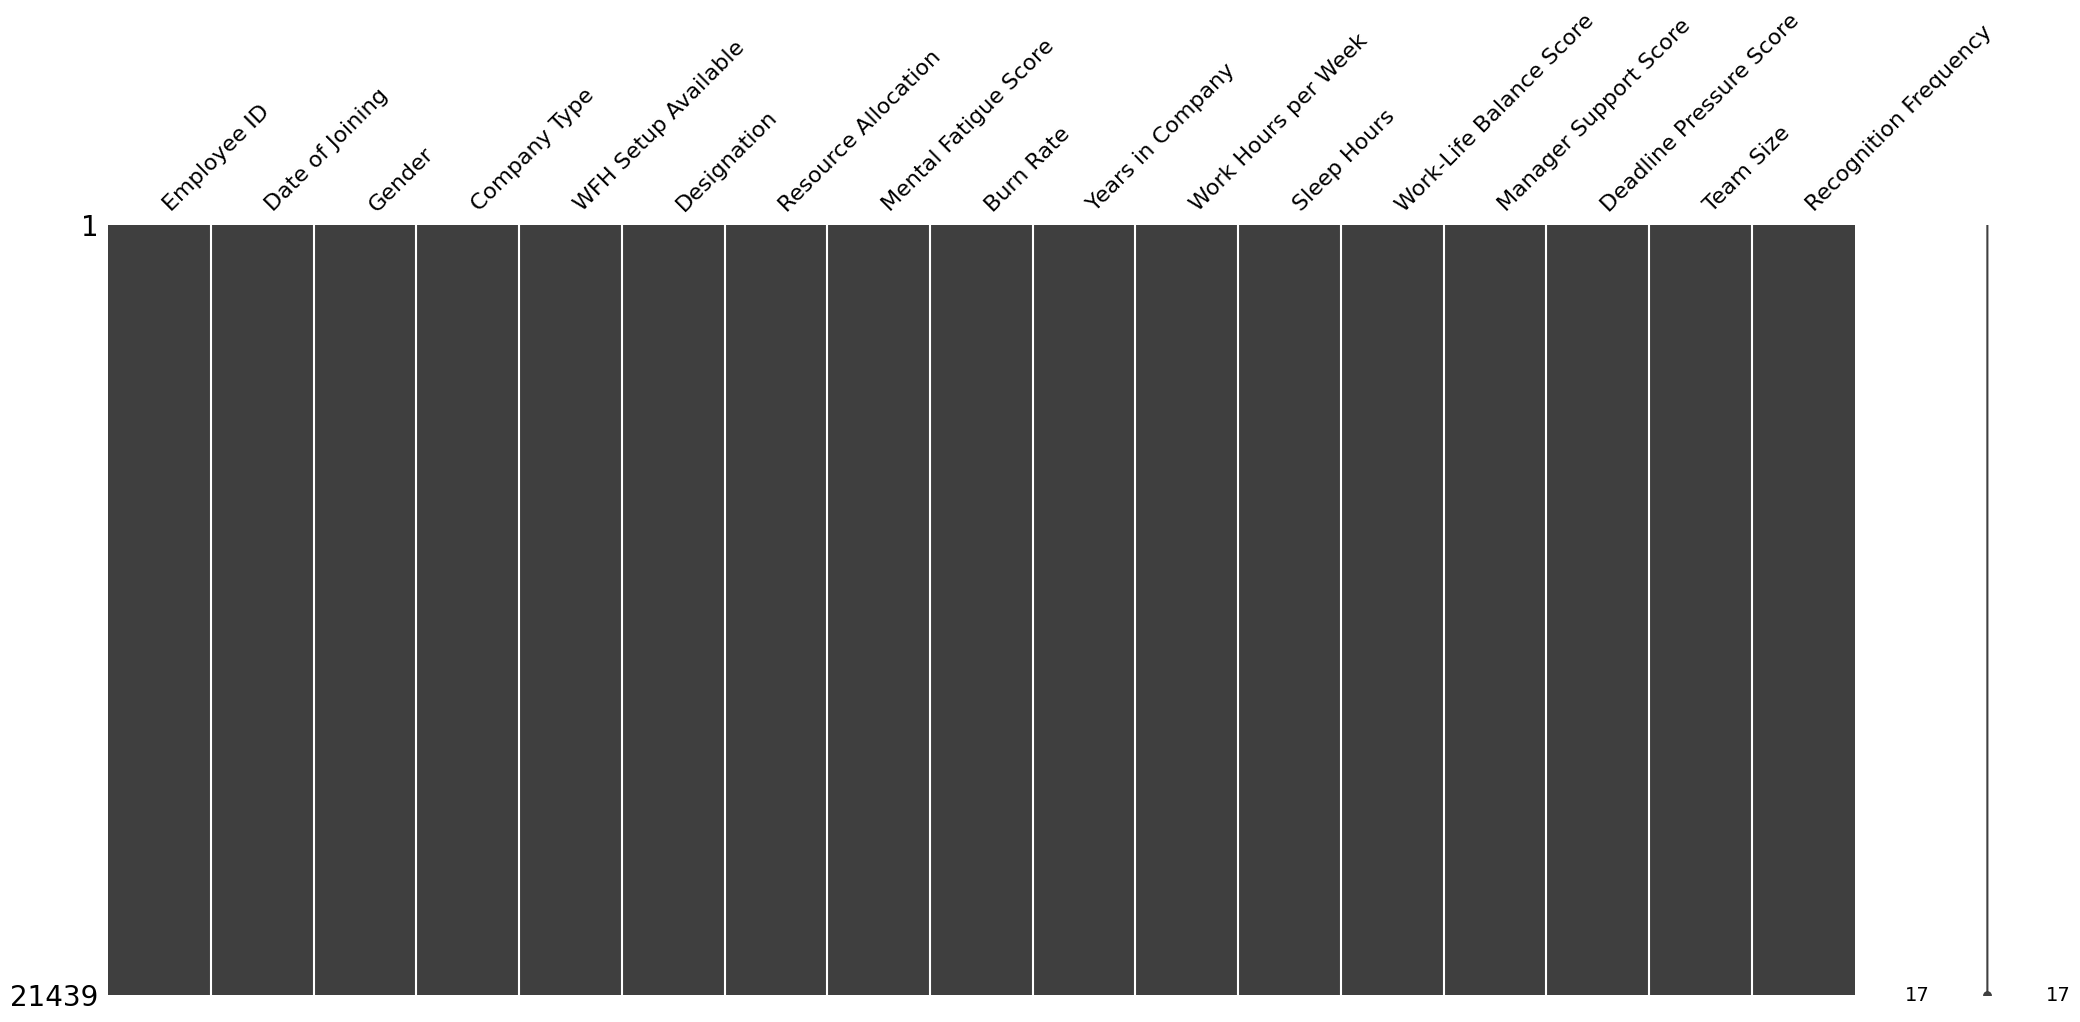

In [119]:
msno.matrix(df_limpio)

#### 2.2 Limpieza de datos: valores duplicados

In [15]:
print("Cantidad de datos duplicados:", df_limpio.duplicated().sum())

Cantidad de datos duplicados: 0


#### 2.3 Limpieza de datos: ajustar tipo de datos adecuado para el análisis

In [16]:
print(f"Columnas del dataframe:\n{df_limpio.dtypes}\n")

Columnas del dataframe:
Employee ID                 object
Date of Joining             object
Gender                      object
Company Type                object
WFH Setup Available         object
Designation                  int64
Resource Allocation        float64
Mental Fatigue Score       float64
Burn Rate                  float64
Years in Company             int64
Work Hours per Week          int64
Sleep Hours                float64
Work-Life Balance Score      int64
Manager Support Score        int64
Deadline Pressure Score      int64
Team Size                    int64
Recognition Frequency        int64
dtype: object



Basándose en el análisis previo de los datos, se observa que la columna "Date of Joining" siempre indica el mismo año, 2008, mientras que "Years in Company" varía únicamente entre 16 y 17 años. Además, el 98,4 % de las filas en "Years in Company" corresponden a 16 años, lo que indica una baja variabilidad en estos registros. Por lo tanto, ambas columnas no aportan información significativa para el análisis y se consideran redundantes, por lo que se decide eliminarlas del conjunto de datos. 

Por otro lado, la columna "Employee ID" funciona únicamente como identificador de cada empleado y no proporciona datos relevantes para los análisis, por lo que también se opta por eliminarla.

In [17]:
# Se genera un nuevo dataset sin las columnas Employee ID, Date of Joining, Year
df = df_limpio.drop(columns=['Employee ID', 'Date of Joining', 'Years in Company'])
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,Female,Service,No,2,3.000000,3.8,0.16,35,7.5,3,3,1,16,2
1,Male,Service,Yes,1,2.000000,5.0,0.36,41,7.1,5,3,3,10,5
2,Female,Product,Yes,2,4.479865,5.8,0.49,53,5.7,2,3,5,17,0
3,Male,Service,Yes,1,1.000000,2.6,0.20,43,6.7,3,3,1,13,2
4,Female,Service,No,3,7.000000,6.9,0.52,51,5.2,1,3,4,18,0


### 3. Análisis de las variables categóricas

Se propone evaluar 3 de las variables como categóricas: Género, Tipo de compañía y Posibilidad de trabajo remoto.

Se observa que el dataset se encuentra balanceado para género (con mayoría de mujeres) y para posibilidad de trabajo remoto (con mayoría de "sí"). Con respecto al tipo de compañía sí se observa un mayor desbalance de las clases, con alrededor de 65% de compañías de Servicios y alrededor de 35% de Productos.

In [18]:
df['Gender']=df['Gender'].astype('category')
df['Company Type']=df['Company Type'].astype('category')
df['WFH Setup Available']=df['WFH Setup Available'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21439 entries, 0 to 22749
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   21439 non-null  category
 1   Company Type             21439 non-null  category
 2   WFH Setup Available      21439 non-null  category
 3   Designation              21439 non-null  int64   
 4   Resource Allocation      21439 non-null  float64 
 5   Mental Fatigue Score     21439 non-null  float64 
 6   Burn Rate                21439 non-null  float64 
 7   Work Hours per Week      21439 non-null  int64   
 8   Sleep Hours              21439 non-null  float64 
 9   Work-Life Balance Score  21439 non-null  int64   
 10  Manager Support Score    21439 non-null  int64   
 11  Deadline Pressure Score  21439 non-null  int64   
 12  Team Size                21439 non-null  int64   
 13  Recognition Frequency    21439 non-null  int64   
dtypes: category

In [19]:
df.describe(include='category')

,Gender,Company Type,WFH Setup Available
count,21439,21439,21439
unique,2,2,2
top,Female,Service,Yes
freq,11253,14014,11587


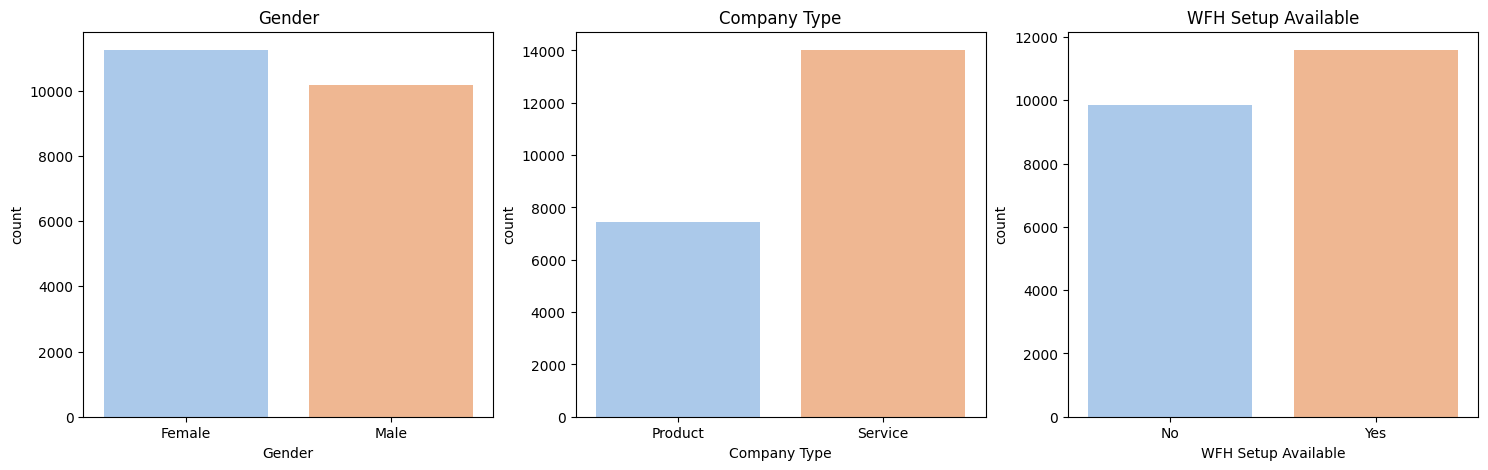

In [20]:
# Gráficos de variables categóricas
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráficos de barras de cada una
sns.countplot(x='Gender', data=df, ax=ax[0], hue='Gender')
sns.countplot(x='Company Type', data=df, ax=ax[1], hue='Company Type')
sns.countplot(x='WFH Setup Available', data=df, ax=ax[2], hue='WFH Setup Available')

# Títulos
ax[0].set_title('Gender')
ax[1].set_title('Company Type')
ax[2].set_title('WFH Setup Available')

plt.show()

### 4. Análisis de las variables numéricas y outliers

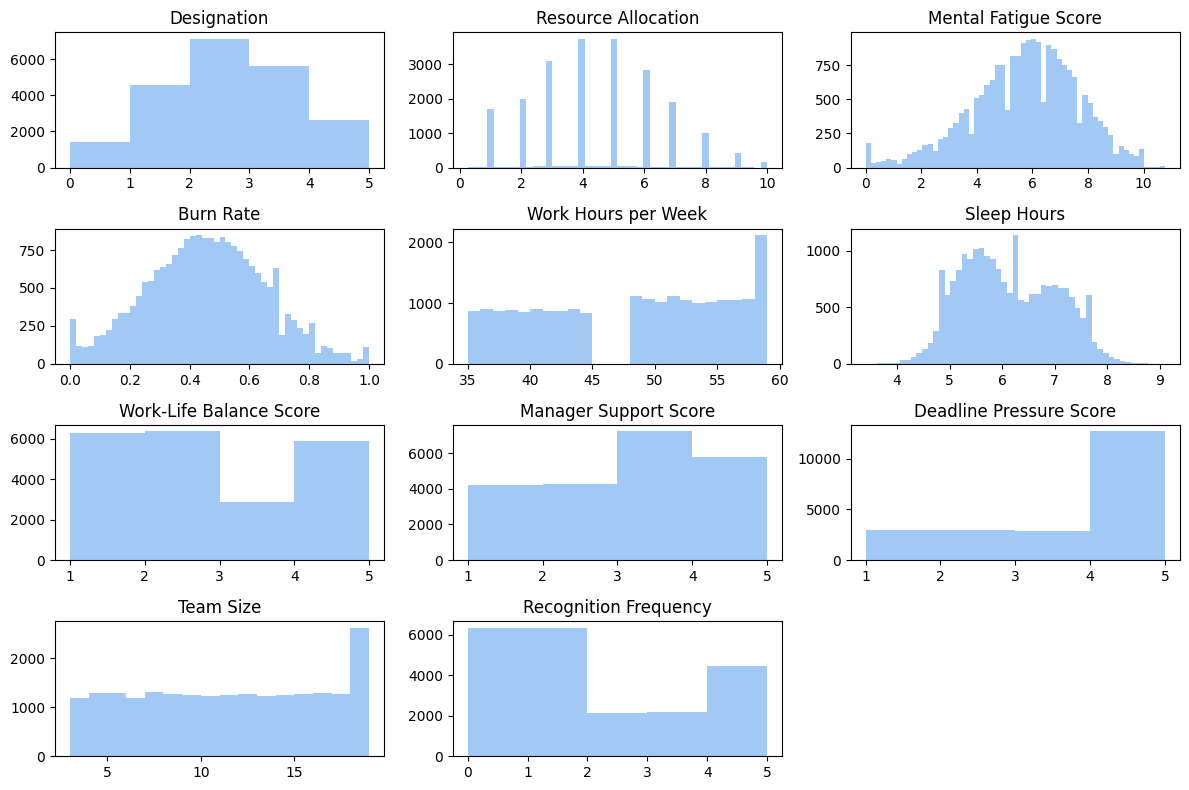

In [21]:
# Selecciona solo columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Plot con subplots (uno por variable)
df_numericas.hist(bins='auto', figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

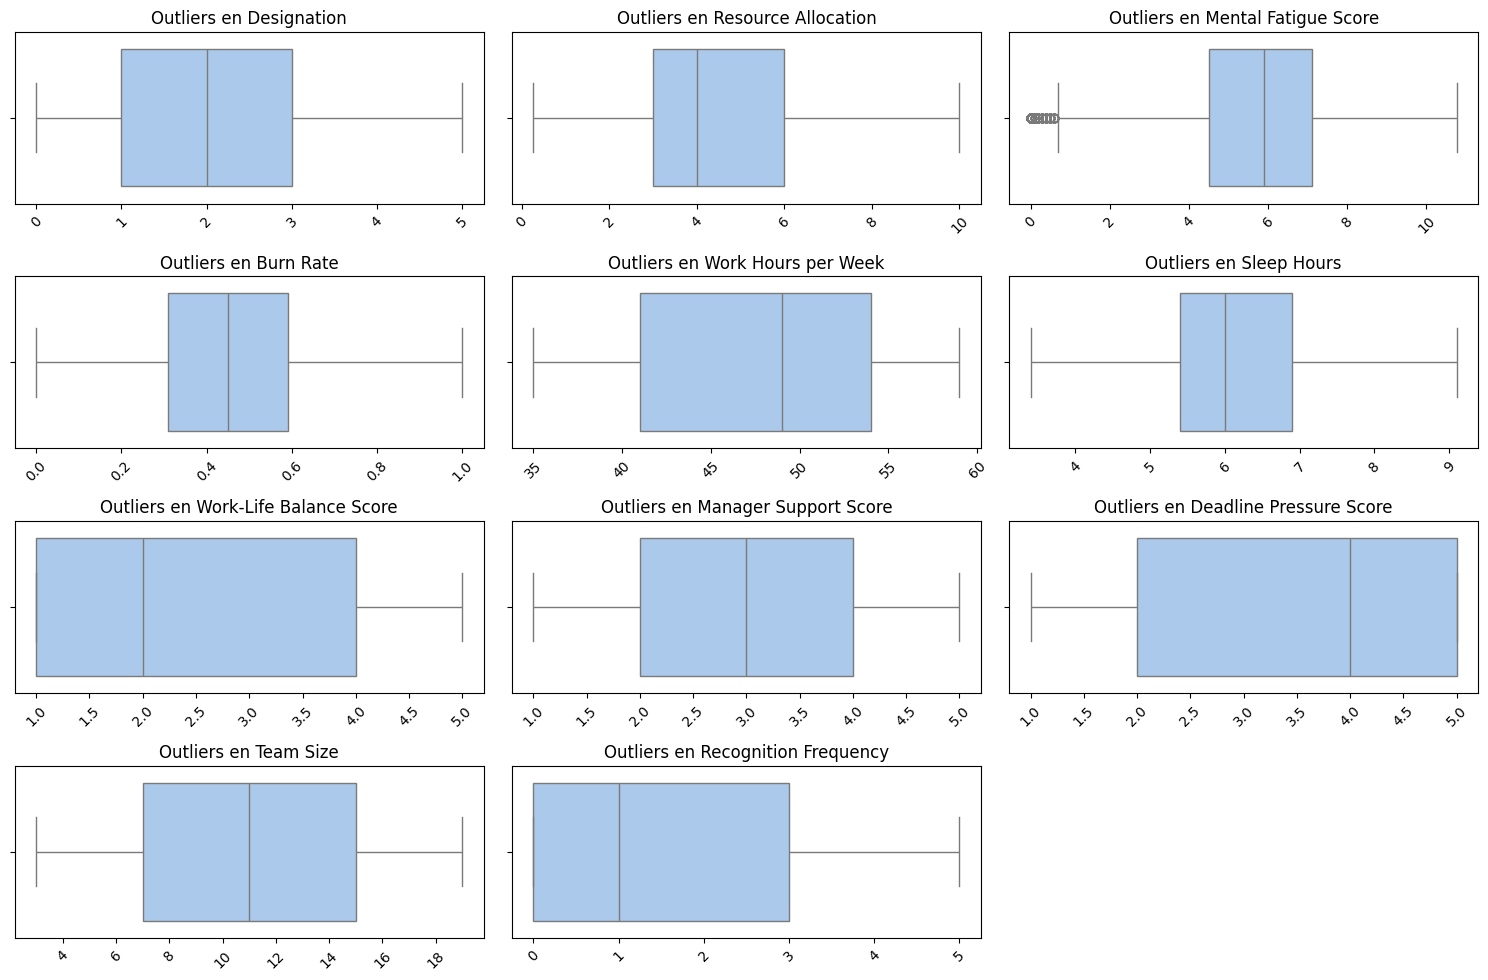

In [22]:
# Detectar outliers con boxplot
import math

# Seleccionar columnas numéricas
numeric_columns = df_numericas.columns

# Crear subplots en 3 columnas
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))

# Aplanar ejes para iterar fácilmente
axes = axes.flatten()

# Graficar cada boxplot en su correspondiente eje
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}')
    axes[i].set_xlabel("")  # Opcional: quitar etiquetas para limpiar
    axes[i].tick_params(axis='x', labelrotation=45)

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Estos gráficos nos permiten identificar visualmente la presencia de outliers (valores atípicos) como puntos fuera de los “bigotes” del boxplot:

- En Mental Fatigue Score, hay varios valores atípicos bajos.

### 5. Análisis de correlación entre variables

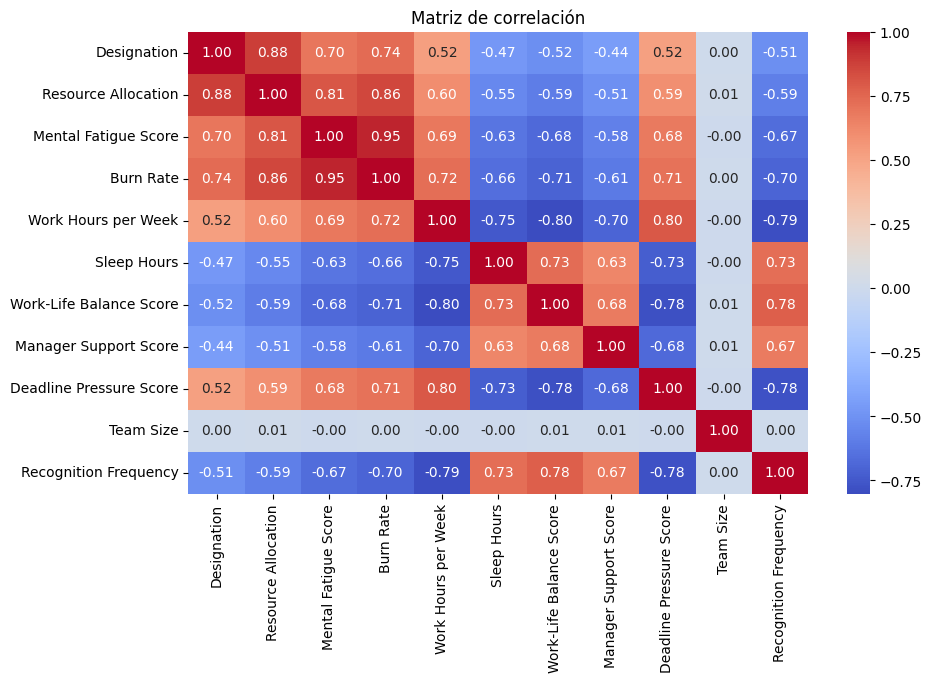

In [23]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

En la matriz de correlación se observan varios patrones relevantes sobre cómo se relacionan las variables con el nivel de agotamiento laboral (Burn Rate) y entre sí:

**Burn Rate tiene alta correlación positiva con:**

- Mental Fatigue Score (0.95)
- Resource Allocation (0.86)
- Designation (0.74)
- Work Hours per Week (0.72)
- Deadline Pressure Score (0.71)

Estas variables están fuertemente asociadas con un mayor agotamiento.

**Burn Rate tiene correlación negativa con:**

- Sleep Hours (-0.66)
- Work-Life Balance Score (-0.71)
- Manager Support Score (-0.61)
- Recognition Frequency (-0.70)

Es decir, más sueño, mejor balance, mayor apoyo y más reconocimiento tienden a reducir el burnout.

*Team Size es la única variable que no muestra correlación significativa con otras variables, por lo que tambien podría ser una variable a eliminar a futuro al momento de modelar alguna solución*

### 6. Conclusiones

¿Existen diferencias significativas en los niveles de agotamiento laboral entre empleados de diferentes tipos de compañías?

*Analizando el gráfico, no se observan diferencias en los niveles de burnout según si el tipo de compañía es de productos o servicios.*

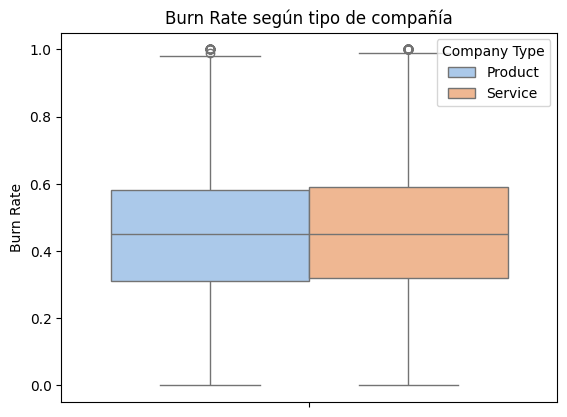

In [24]:
sns.boxplot(data=df, y='Burn Rate', hue='Company Type')
plt.title('Burn Rate según tipo de compañía')
plt.show()

¿En qué medida el apoyo percibido de la organización reduce los niveles de agotamiento laboral entre los empleados?

*Se observa que el nivel de agotamiento laboral es mayor para los empleados que perciben un menor apoyo de la organización, y que disminuye para los casos en que se percibe más apoyo. Además, para los casos en que se percibe menor apoyo (nivel 1 y 2) se observa una gran cantidad de outliers con valores altos (mayores a Q3 + 1.5 * IQR). Esto significa que en estos casos se observan tasas de agotamiento laboral muy superiores al resto de los encontrados en nuestra distribución.*

En niveles bajos de apoyo (1-2), el Burn Rate nunca desciende por debajo de 0.4, incluso en empleados con equilibrio trabajo-vida adecuado o bajo carga laboral.

En niveles altos (4-5), el Burn Rate se mantiene por debajo de 0.3 (con un mínimo de 0.16 en el percentil 95).

Algo importante a considerar, es que es una variable estratégicametne controlable dentro de la compañia, a diferencia de factores como las horas de sueño o el equilibrio personal, el apoyo gerencial es un factor modificable mediante políticas internas (ej: capacitación, cultura organizacional).

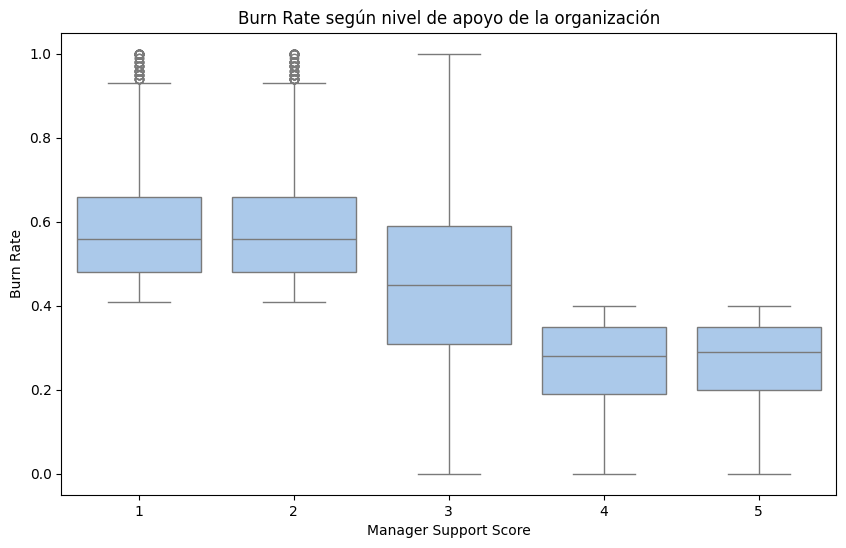

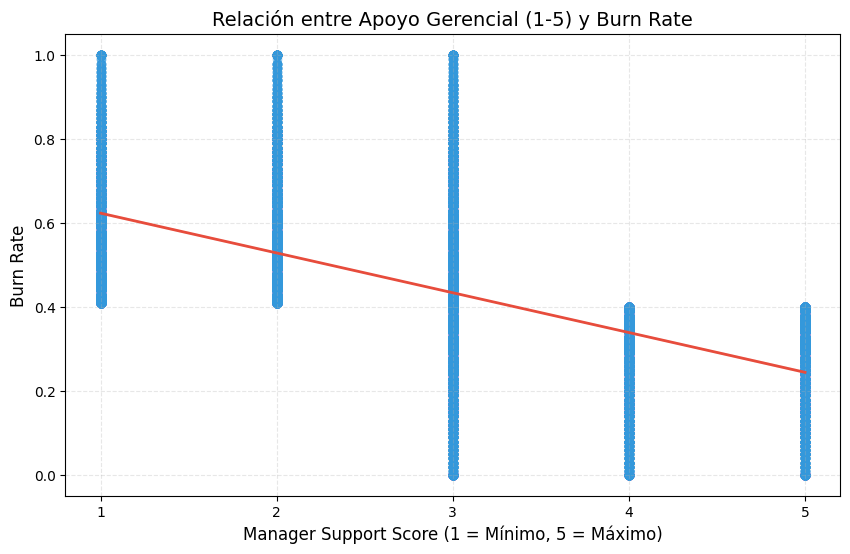

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Burn Rate', x='Manager Support Score')
plt.title('Burn Rate según nivel de apoyo de la organización')
plt.xlabel('Manager Support Score')
plt.ylabel('Burn Rate')
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(
    x="Manager Support Score", 
    y="Burn Rate", 
    data=df, 
    scatter_kws={"alpha": 0.4, "color": "#3498DB"}, 
    line_kws={"color": "#E74C3C", "lw": 2}, 
    ci=95
)
plt.title("Relación entre Apoyo Gerencial (1-5) y Burn Rate", fontsize=14)
plt.xlabel("Manager Support Score (1 = Mínimo, 5 = Máximo)", fontsize=12)
plt.ylabel("Burn Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.3)
plt.xticks(range(1, 6))  # Asegurar que el eje X muestre solo valores de 1 a 5
plt.show()


¿Cómo influye el equilibrio entre el trabajo y la vida personal, y la cantidad de horas de descanso en los niveles de agotamiento laboral?

*Se observa que en los casos en que el nivel de equilibrio entre trabajo y vida personal es más bajo, el nivel de agotamiento laboral es mayor, especialmente en los niveles 1 y 2. Además, similar a lo que ocurría en el caso anterior, se observan valores atípicos para el burn rate en los niveles 1 y 2, que están por encima de los valores encontrados en esta distribución. Con respecto a la cantidad de horas de descanso, se observa que las tasas de agotamiento laboral son más bajas cuando las horas de sueño son mayores a 6.5-7 hs. Ambos gráficos se condicen con lo esperado, es decir, que el agotamiento laboral es mayor cuanto peor es el equilibrio entre trabajo y vida laboral y menores son las horas de descanso.*

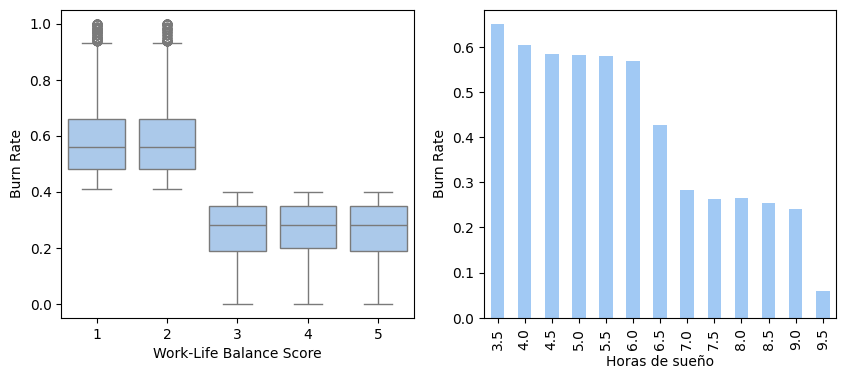

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Work-Life Balance Score
sns.boxplot(data=df, y='Burn Rate', x='Work-Life Balance Score', ax=ax[0])
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Burn Rate')

# Horas de sueño - Agrupando los valores cada media hora y redondeando hacia arriba
df['Rango_Descanso'] = np.ceil(df['Sleep Hours'] * 2) / 2
df.groupby('Rango_Descanso')['Burn Rate'].mean().plot(kind='bar', ax=ax[1])
plt.xlabel('Horas de sueño')
plt.ylabel('Burn Rate')

plt.show()

¿Existe un umbral crítico de horas de trabajo o fatiga mental a partir del cual el burnout se incrementa drásticamente?

*El objetivo es detectar si existe un punto de inflexión entre las horas trabajadas por semana y la fatiga mental a partil del cuál el burnout se incrementa drásticamente.*

- *En cuanto a las Horas de trabajo vs. Burnout, se observa un cambio abrupto alrededor de las 46-47 horas semanales. Antes de ese umbral, el aumento del Burn Rate es moderado. A partir de este punto, el burnout sube más rápido y se estabiliza en niveles altos.*

- *Por otra parte, la fatiga mental vs. Burnout muestra una relación claramente no lineal y creciente. A partir de un puntaje de fatiga mental cercano a 6 o 7, el burnout se acelera exponencialmente. Esto indica que incluso diferencias pequeñas en niveles de fatiga alta pueden tener gran impacto en el agotamiento.*

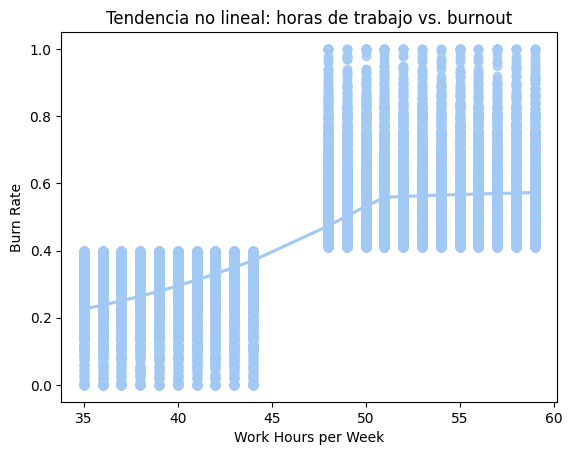

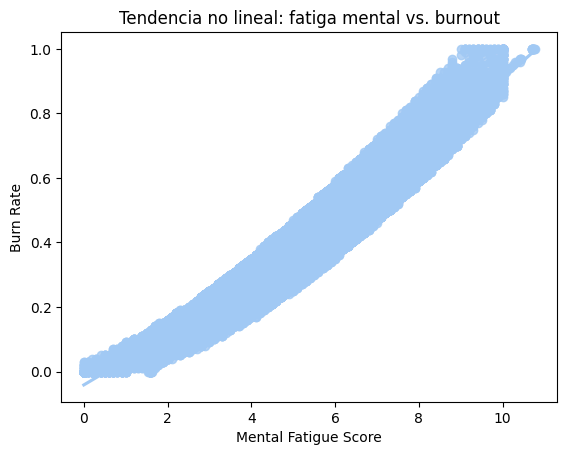

In [27]:
# Relación entre horas de trabajo y burnout
sns.regplot(data=df, x='Work Hours per Week', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: horas de trabajo vs. burnout')
plt.show()

# Relación entre fatiga mental y burnout
sns.regplot(data=df, x='Mental Fatigue Score', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: fatiga mental vs. burnout')
plt.show()